In [1]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import time


In [2]:
#Test class for points bounded by a rectangle.
def Points_in_square(square, num_points):
  points = []

  x_coordinates, y_coordinates = zip(*square)
  min_x, min_y, max_x, max_y  = min(x_coordinates), min(y_coordinates), max(x_coordinates), max(y_coordinates)

  for _ in range(num_points):
    x = np.random.uniform(min_x, max_x)
    y = np.random.uniform(min_x, max_x)
    points.append([x,y])
  return points

In [3]:
#Test class for points bounded by a circle.
def Points_in_circle(r, x_center, y_center, num_points):
  points = []

  for _ in range(num_points):
      radius = r * math.sqrt(random.random())
      theta = 2 * math.pi * random.random()
      x = x_center + radius * math.cos(theta)
      y = y_center + radius * math.sin(theta)
      points.append([x, y])
  return points

In [4]:
def Points_exponential(num_points, min_range, max_range):
  points = []

  for _ in range(num_points):
    x = np.random.uniform(min_range, max_range)
    y = -math.pow(x, 2)
    points.append([x,y])
  return points

In [5]:
def Plot_hull(points, UH):
  arr_points = np.array(points)
  arr_UH = np.array(UH)
  plt.scatter(arr_points[:,0], arr_points[:,1], color='blue')
  plt.scatter(arr_UH[:,0], arr_UH[:,1],color='red')
  plt.show()

In [6]:
#Part A: Graham's Scan
def INC_CH(points):
  UH = []
  points.sort()
  UH.append(points[0])
  UH.append(points[1])
  s = 1
  for i in range(2, len(points)):
    while s >= 2 and isLeft(points[i], UH[s], UH[s-1]):
      UH = UH[:-1]
      s -= 1
    UH.append(points[i])
    s += 1
  return UH

def isLeft(np, cp, pp):
  #Taken from slide 22 of lecture 3.
  sign = pp[0]*(cp[1]-np[1])+cp[0]*(np[1]-pp[1])+np[0]*(pp[1]-cp[1])
  return sign > 0


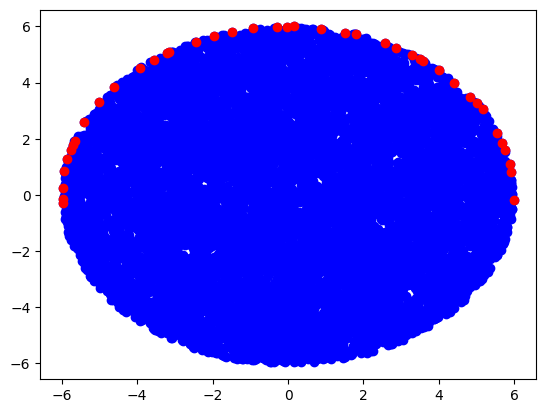

In [8]:
#Test for Graham's scan with circle test class
points = Points_in_circle(6, 0, 0, 10000)

UH = INC_CH(points)

Plot_hull(points, UH)

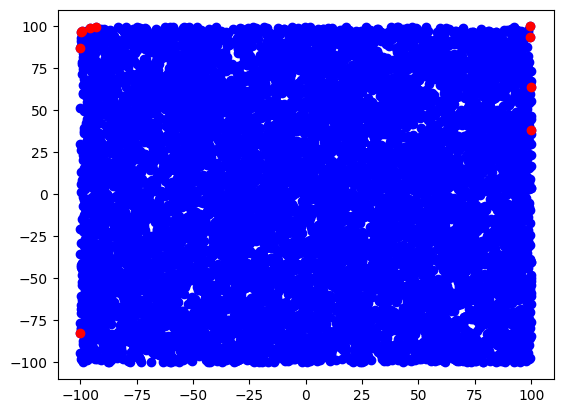

In [9]:
#Test for Graham's scan with square test class
x_min, y_min, x_max, y_max = -100,-100, 100, 100
square = [[x_min, y_min],[x_max, y_max]]
points = Points_in_square(square, 10000)

UH = INC_CH(points)

Plot_hull(points, UH)

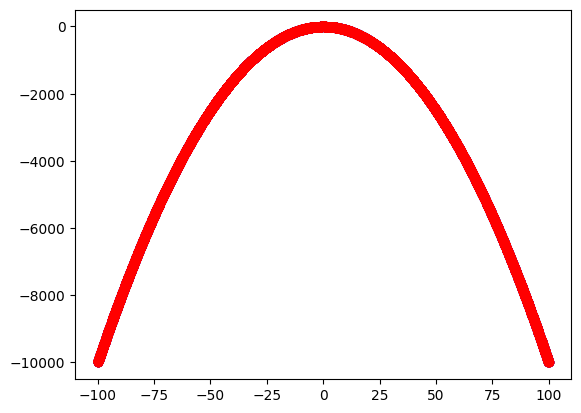

In [10]:
#Test for Graham's scan with exponential test class
points = Points_exponential(10000, -100, 100)

UH = INC_CH(points)
#print("The Upper Hull is:", UH)

Plot_hull(points, UH)